# **COVID-19 Infected_Score Predication**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from keras.layers import Dense 
%matplotlib inline

Using TensorFlow backend.


In [0]:
#Importing Training data
df=pd.read_csv('/content/drive/My Drive/flipr/Train_dataset.csv')

In [4]:
df.describe()

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.000000,10403.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
mean,10084.893784,1.062770,3.285888,0.523241,42.083722,9.013067,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,7108.663645,0.818222,2.721274,0.854303,15.323397,3.714970,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,2679.250000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,10003.500000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,15141.750000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313
max,22695.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,97.632000


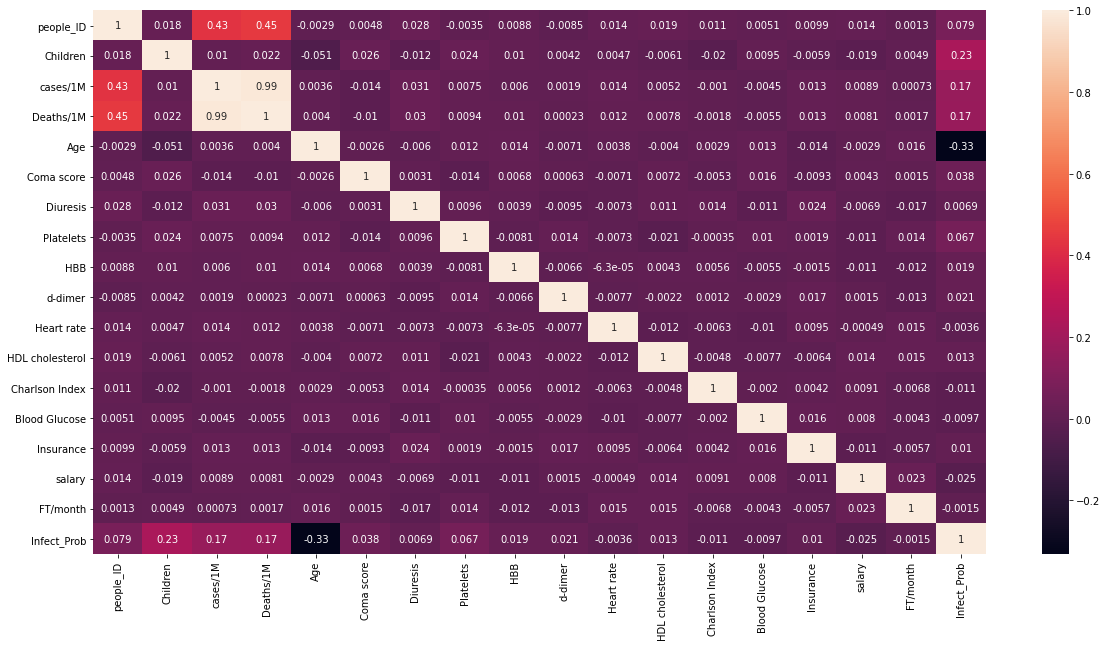

In [5]:
#Correlation 
cor=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,)

In [0]:
#Dropping irrelevant features
df=df.drop(['people_ID','Name','Designation'],axis=1)

In [0]:
# High correlation between cases/1M and death/1M(0.99)
df=df.drop(['Deaths/1M'],axis=1)

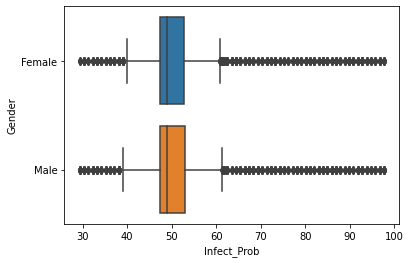

In [8]:
#Plotting boxplot of Infect_prob wrt gender
sns.boxplot(df['Infect_Prob'],df['Gender'])

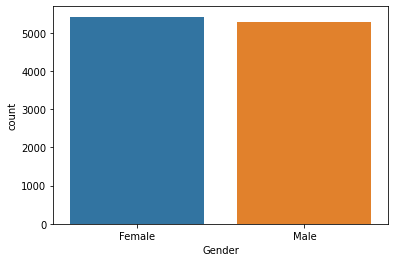

In [9]:
sns.countplot(df['Gender'])

In [0]:
#Drop Gender as it has no relevance to output
df=df.drop(['Gender'],axis=1)

In [11]:
df['Married'].value_counts()

YES    8481
NO     2233
Name: Married, dtype: int64

In [0]:
#Encoding(Yes=1,No=0)
df['Married']=df['Married'].replace("YES",1)
df['Married']=df['Married'].replace("NO",0)

In [13]:
df['Children'].value_counts()

2.0    3829
1.0    3398
0.0    3176
Name: Children, dtype: int64

In [0]:
#Replacing nan values with mode value(categorical variable)
df['Children']=df['Children'].replace('2',2)
df['Children']=df['Children'].replace('1',1)
df['Children']=df['Children'].replace('0',0)
df['Children']=df['Children'].replace(np.NaN,2)

In [0]:
#Encoding
df['Pulmonary score']=df['Pulmonary score'].replace('<400',0)
df['Pulmonary score']=df['Pulmonary score'].replace('<300',1)
df['Pulmonary score']=df['Pulmonary score'].replace('<200',2)
df['Pulmonary score']=df['Pulmonary score'].replace('<100',3)

In [16]:
#Grouping of cardiological and pulnomary score
grouped = df.groupby(['Pulmonary score','cardiological pressure'])
grouped.size()

Pulmonary score  cardiological pressure
0                Normal                    2681
1                Elevated                  2641
2                Stage-01                  2657
3                Stage-02                  2638
dtype: int64

In [0]:
#Drop cardiological pressure as is correlates with pulmonary
df=df.drop(['cardiological pressure'],axis=1)

In [18]:
df['comorbidity'].value_counts()

Hypertension              2642
None                      2637
Diabetes                  2614
Coronary Heart Disease    2595
Name: comorbidity, dtype: int64

In [0]:
#Replacing nan values with forward fill method
df['comorbidity']=df['comorbidity'].fillna(method='ffill',axis=0)

In [0]:
#convert category to int
df['comorbidity']=df['comorbidity'].replace('Hypertension',3)
df['comorbidity']=df['comorbidity'].replace('Diabetes',2)
df['comorbidity']=df['comorbidity'].replace('Coronary Heart Disease',1)
df['comorbidity']=df['comorbidity'].replace('None',0)

In [21]:
df['Mode_transport'].value_counts()

Public    3588
Walk      3568
Car       3555
Name: Mode_transport, dtype: int64

In [0]:
#impute missing values with mode value(public=2)
#Since only 3 missing values
df['Mode_transport']=df['Mode_transport'].replace('Public',2)
df['Mode_transport']=df['Mode_transport'].replace('Walk',1)
df['Mode_transport']=df['Mode_transport'].replace('Car',0)
df['Mode_transport']=df['Mode_transport'].replace(np.NaN,2)

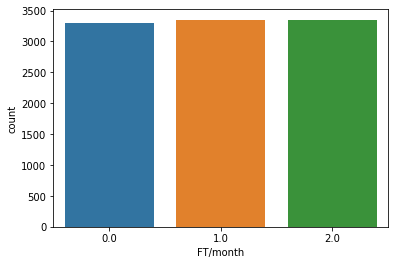

In [23]:
sns.countplot(df['FT/month'])

In [24]:
df['FT/month'].value_counts()

1.0    3351
2.0    3343
0.0    3297
Name: FT/month, dtype: int64

In [0]:
#Filling missing values with mode (1)
df['FT/month']=df['FT/month'].fillna(1)

***Plotting box plot for various features ***


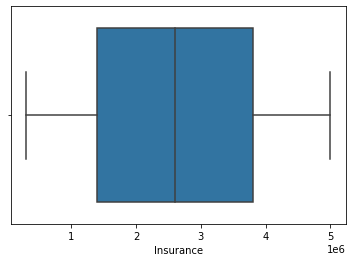

In [26]:
sns.boxplot(df['Insurance'])

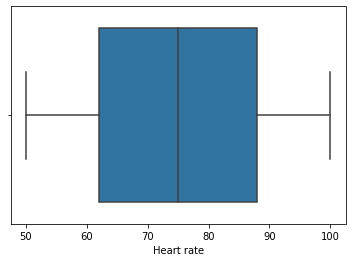

In [27]:
sns.boxplot(df['Heart rate'])

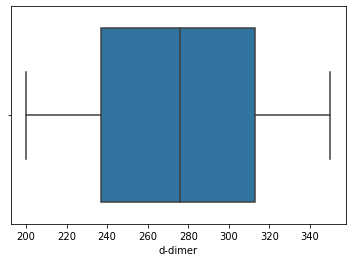

In [28]:
sns.boxplot(df['d-dimer'])

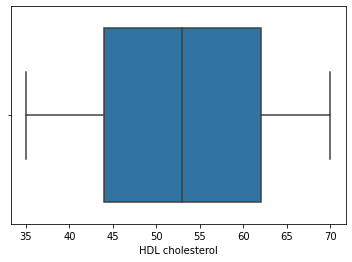

In [29]:
sns.boxplot(df['HDL cholesterol'])

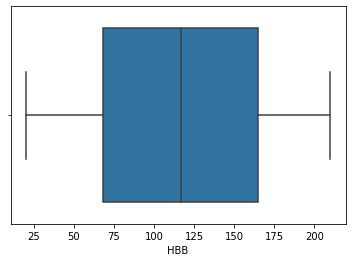

In [30]:
sns.boxplot(df['HBB'])

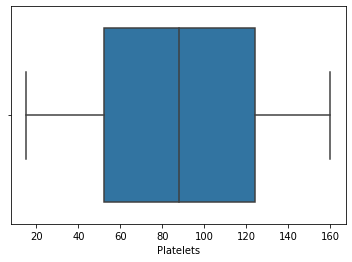

In [31]:
sns.boxplot(df['Platelets'])

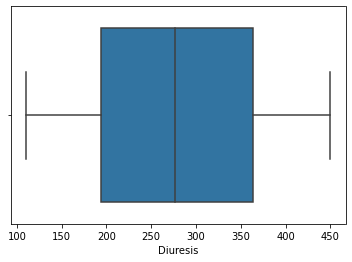

In [32]:
sns.boxplot(df['Diuresis'])

**No outliers** present,
Fill missing value with **Mean Value**

In [0]:
#No outliers present 
df['Insurance']=df['Insurance'].fillna(df['Insurance'].mean())
df['Heart rate']=df['Heart rate'].fillna(df['Heart rate'].mean())
df['d-dimer']=df['d-dimer'].fillna(df['d-dimer'].mean())
df['HDL cholesterol']=df['HDL cholesterol'].fillna(df['HDL cholesterol'].mean())
df['HBB']=df['HBB'].fillna(df['HBB'].mean())
df['Platelets']=df['Platelets'].fillna(df['Platelets'].mean())
df['Diuresis']=df['Diuresis'].fillna(df['Diuresis'].mean())

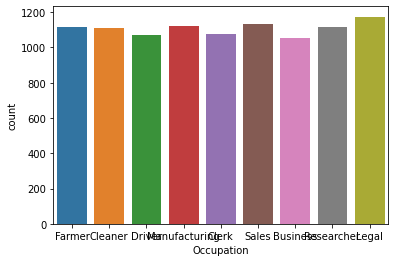

In [34]:
#Countplot for Occupation Features
sns.countplot(df['Occupation'])

In [0]:
#Since all categories are approximately available in equal no.
#We make a new Other category
df['Occupation']=df['Occupation'].fillna('Other')

In [0]:
#Label Encoding for Occupation features
le = LabelEncoder() 
df['Occupation']= le.fit_transform(df['Occupation'])

In [0]:
#Label Encoding for Region features
le1 = LabelEncoder() 
df['Region']= le1.fit_transform(df['Region'])

In [0]:
#Seperate dependent and independent variables 
x=df.iloc[:,:-1]
y=df['Infect_Prob']

In [0]:
#Spillting of training and validation set
x_train,x_val,y_train,y_val = train_test_split(x,y, test_size=0.20, random_state=0)

**Grid Search CV**

In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2,5,8,10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,500,1000,1500]}

In [0]:
# Instantiate the grid search model
grid_search= GridSearchCV( estimator=RandomForestRegressor(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)   

In [0]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 32.9min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 500}

**Random Forest Regressor**

In [0]:
reg=RandomForestRegressor(n_estimators=500,bootstrap=True,max_depth=10,max_features=3,min_samples_leaf=4,min_samples_split=8,random_state=0)
reg.fit(x_train,y_train)
pre=reg.predict(x_val)

In [43]:
#Root Mean Square error(RMSE) Calculation
error=(pre-y_val)**2
err=np.sqrt((error.sum())/x_val.shape[0])
err

9.051754433922298

**ANN Model**

In [0]:
# Feature Scaling
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [45]:
# For building Neural Network Layers 
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2816      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 167,681
Trainable params: 167,681
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Fitting the NN
NN_model.fit(x, y, epochs=500, batch_size=32, validation_split = 0.2)




Train on 8571 samples, validate on 2143 samples
Epoch 1/500





8571/8571 [==============================] - 2s 199us/step - loss: 9.7323 - mean_absolute_error: 9.7323 - val_loss: 5.9558 - val_mean_absolute_error: 5.9558
Epoch 2/500
8571/8571 [==============================] - 1s 123us/step - loss: 5.6461 - mean_absolute_error: 5.6461 - val_loss: 5.5305 - val_mean_absolute_error: 5.5305
Epoch 3/500
8571/8571 [==============================] - 1s 114us/step - loss: 5.1423 - mean_absolute_error: 5.1423 - val_loss: 4.8729 - val_mean_absolute_error: 4.8729
Epoch 4/500
8571/8571 [==============================] - 1s 115us/step - loss: 4.7494 - mean_absolute_error: 4.7494 - val_loss: 4.5388 - val_mean_absolute_error: 4.5388
Epoch 5/500
8571/8571 [==============================] - 1s 121us/step - loss: 4.4689 - mean_absolute_error: 4.4689 - val_loss: 4.2088 - val_mean_absolute_error: 4.2088
Epoch 6/500
8571/8571 [==============================] - 1s 112us/step - loss: 4.3004 - mean_absolu

# Conclusion

>**Random Forest model** gives a **RMSE error 9.05** on validation set which is quite well


>**ANN model** gives a **MSE error 0.4 on training set** and **4.07 on validation set**.
 As MSE of training set is very small ,it seems to be case of overfitting  but the MSE of validation is also small nearly 4 which states our model is trained well






# **TEST DATASET**

In [0]:
#Import test datset
test=pd.read_csv('/content/drive/My Drive/flipr/Test_dataset.csv')

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 27 columns):
people_ID                 14498 non-null int64
Region                    14498 non-null object
Gender                    14498 non-null object
Designation               14498 non-null object
Name                      14466 non-null object
Married                   14498 non-null object
Children                  14498 non-null int64
Occupation                14498 non-null object
Mode_transport            14498 non-null object
cases/1M                  14498 non-null int64
Deaths/1M                 14498 non-null int64
comorbidity               14498 non-null object
Age                       14498 non-null int64
Coma score                14498 non-null int64
Pulmonary score           14498 non-null object
cardiological pressure    14498 non-null object
Diuresis                  14498 non-null int64
Platelets                 14498 non-null int64
HBB                       14498 non

In [0]:
#Saving people ID column
people_ID=test['people_ID']

In [0]:
#Drop the features
test=test.drop(['people_ID','Name','Designation','Gender','Deaths/1M','cardiological pressure'],axis=1)

In [0]:
#Encoding(Yes=1,No=0)
test['Married']=test['Married'].replace("YES",1)
test['Married']=test['Married'].replace("NO",0)

In [0]:
#Encoding
test['Mode_transport']=test['Mode_transport'].replace('Public',2)
test['Mode_transport']=test['Mode_transport'].replace('Walk',1)
test['Mode_transport']=test['Mode_transport'].replace('Car',0)

In [0]:
#Encoding
test['comorbidity']=test['comorbidity'].replace('Hypertension',3)
test['comorbidity']=test['comorbidity'].replace('Diabetes',2)
test['comorbidity']=test['comorbidity'].replace('Coronary Heart Disease',1)
test['comorbidity']=test['comorbidity'].replace('None',0)

In [0]:
#Encoding
test['Pulmonary score']=test['Pulmonary score'].replace('<400',0)
test['Pulmonary score']=test['Pulmonary score'].replace('<300',1)
test['Pulmonary score']=test['Pulmonary score'].replace('<200',2) 
test['Pulmonary score']=test['Pulmonary score'].replace('<100',3)

In [0]:
#Label Encoding
test['Occupation']= le.fit_transform(test['Occupation'])
test['Region']= le1.fit_transform(test['Region'])

In [0]:
# Feature Scaling
sc_x = StandardScaler()
test = sc_x.fit_transform(test)

**Prediction of Final Score**

In [0]:
final_score=NN_model.predict(test)

In [0]:
#Saving as Infect_prob column
Infect_prob=pd.DataFrame(final_score,columns=['Infect_prob'])

In [59]:
Infect_prob.describe()

,Infect_prob
count,14498.000000
mean,51.676651
std,7.912461
min,29.248772
25%,47.510273
50%,49.127766
75%,52.195992
max,99.791245


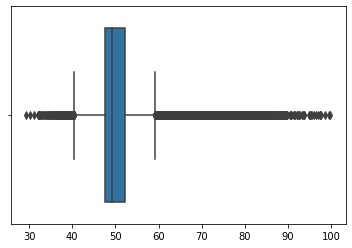

In [60]:
sns.boxplot(Infect_prob)

In [0]:
#Concate ID and Infect_prob
final=pd.concat([people_ID, Infect_prob], axis=1)

In [62]:
final.head()

,people_ID,Infect_prob
0,5942,50.684738
1,18664,50.563156
2,5603,51.569592
3,5649,50.514904
4,5099,50.466034


In [0]:
# saving the dataframe 
final.to_csv('Task1.csv') 